<!-- Importing Libraries -->

# Importing Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

# Importing Dataset

In [28]:
date = pd.read_csv(r"E:\Solution Challenge\Cafe\Cafe+-+DateInfo.csv")
transaction = pd.read_csv(r"E:\Solution Challenge\Cafe\Cafe+-+Transaction+-+Store.csv")

# Filtering Data

In [29]:
transaction = transaction[transaction["SELL_ID"] == 1070]

In [30]:
transaction['YEAR'] = pd.DatetimeIndex(transaction['CALENDAR_DATE']).year
transaction['DATE'] = pd.DatetimeIndex(transaction['CALENDAR_DATE']).day

In [31]:
transaction = transaction[transaction["YEAR"] == 2012]

In [32]:
transaction = transaction.reset_index(drop = True)

In [33]:
transaction = transaction.drop(['PRICE', 'SELL_CATEGORY'], axis = 1)


In [34]:
date = date[date["YEAR"] == 2012]

In [35]:
date = date.drop(['CALENDAR_DATE', 'YEAR', 'IS_SCHOOLBREAK','AVERAGE_TEMPERATURE', 'IS_OUTDOOR'], axis = 1)

# Merging Datasets

In [36]:
transaction['HOLIDAY'] = date['HOLIDAY']
transaction['IS_WEEKEND'] = date['IS_WEEKEND']

In [37]:
transaction.head()

,CALENDAR_DATE,QUANTITY,SELL_ID,YEAR,DATE,HOLIDAY,IS_WEEKEND
0,01/01/12,46,1070,2012,1,New Year,1
1,01/02/12,70,1070,2012,2,New Year,0
2,01/03/12,62,1070,2012,3,New Year,0
3,01/04/12,88,1070,2012,4,NaN,0
4,01/05/12,104,1070,2012,5,NaN,0


In [38]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CALENDAR_DATE  365 non-null    object
 1   QUANTITY       365 non-null    int64 
 2   SELL_ID        365 non-null    int64 
 3   YEAR           365 non-null    int64 
 4   DATE           365 non-null    int64 
 5   HOLIDAY        29 non-null     object
 6   IS_WEEKEND     365 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 20.1+ KB


In [39]:
def bar_plot(variable):
    # get feature
    var = transaction[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

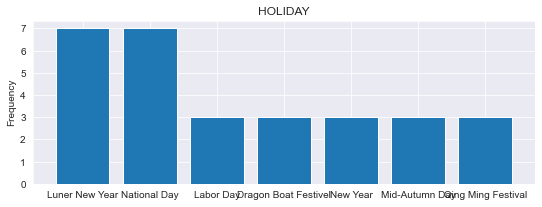

HOLIDAY:
Luner New Year          7
National Day            7
Labor Day               3
Dragon Boat Festivel    3
New Year                3
Mid-Autumn Day          3
Qing Ming Festival      3
Name: HOLIDAY, dtype: int64


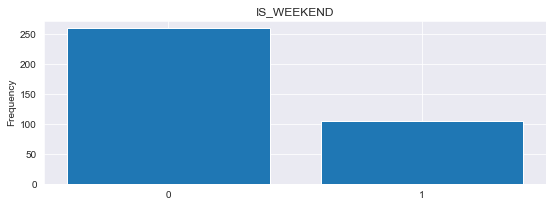

IS_WEEKEND:
0    260
1    105
Name: IS_WEEKEND, dtype: int64


In [40]:
sns.set_style('darkgrid')
categorical_variables = ['HOLIDAY','IS_WEEKEND']
for c in categorical_variables:
    bar_plot(c)

In [41]:
transaction.dtypes

CALENDAR_DATE    object
QUANTITY          int64
SELL_ID           int64
YEAR              int64
DATE              int64
HOLIDAY          object
IS_WEEKEND        int64
dtype: object

# Basic Data Analysis

In [42]:
transaction[["HOLIDAY","QUANTITY"]].groupby(["HOLIDAY"], as_index = False).mean().sort_values(by="QUANTITY",ascending = False)

,HOLIDAY,QUANTITY
1,Labor Day,63.333333
3,Mid-Autumn Day,61.333333
6,Qing Ming Festival,61.333333
0,Dragon Boat Festivel,60.666667
5,New Year,59.333333
4,National Day,56.571429
2,Luner New Year,54.000000
